In [3]:
from datetime import datetime as dt

import numpy as np

from analsis.analsis_utils.plot_utils import plot_binned_metric_vs_mean_metric, plot_3d_three_metrices_vs_mean_metric, \
    plot_two_binned_metrices_vs_third_means_metrics_colors
import pandas as pd
import matplotlib.pyplot as plt

blues = ["#63bff0", "#a7d5ed", "#0d88e6", ]
rads = ["#ea5545", "#e1a692", "#b30000", ]

In [4]:
base_path = '/home/labs/schneidmann/noamaz/modularity'
base_path = '/Volumes/noamaz/modularity'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
out_folder = 'plots/retina_from_label_to_arch_to_label'
original_archs_res=pd.read_csv('/Volumes/noamaz/modularity/teach_archs/retina/2023-04-13-16-23-07_all_results_from_retina_teach_archs_results.csv')

task_name = 'retina'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
results_path = f"{base_path}/teach_archs/{task_name}"
num_features = 20
results_folder_no_val = 'retina_teach_archs_models_requiered_features/20_features/retina_teach_archs_models_requiered_features_no_val_on_equal_arch'
res_csv_name_no_val = '2023-05-26-15-55-12_all_results_combined.csv'
res_no_val = pd.read_csv(f"{results_path}/{results_folder_no_val}/{res_csv_name_no_val}")

results_folder = 'retina_teach_archs_models_requiered_features/20_features/'
res_csv_name = "2023-05-27-10-16-05_all_results_combined.csv"
res = pd.read_csv(f"{results_path}/{results_folder}/{res_csv_name}")

res = pd.concat((res_no_val, res))

In [5]:
res['mean_requiered_performance'] = res[['required_performance_min', 'required_performance_max']].mean(axis=1)
std =(original_archs_res['mean_performance'].std() / 2)


res['required_performance_min'] = res['mean_requiered_performance'] - std
res['required_performance_max'] = res['mean_requiered_performance'] + std

res['bigger'] = res['required_performance_min'] <=  res['mean_performance']
res['smaller']  = res['mean_performance'] <= res['required_performance_max']
res['is_within_required_performance_std_range'] = res[['bigger', 'smaller']].all(axis = 1)

In [6]:
successes_fail_column_name = 'is_within_required_performance_std_range'
res = res.sort_values('mean_requiered_performance')
correct_res = res[res[successes_fail_column_name] == True]
incorrect_res = res[res[successes_fail_column_name] == False]

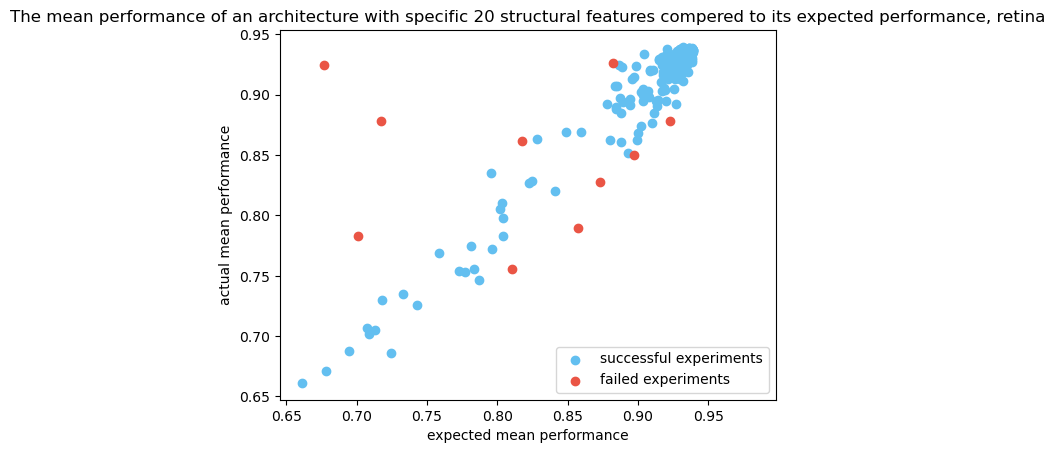

In [7]:
plt.scatter(correct_res['mean_requiered_performance'], correct_res['mean_performance'], c='#63bff0',
            label='successful experiments')
plt.errorbar(
    correct_res['mean_requiered_performance'],
    correct_res['mean_performance'],
    xerr=[correct_res['required_performance_min'] - correct_res['mean_requiered_performance'],
          correct_res['required_performance_max'] - correct_res['mean_requiered_performance']],
    linestyle='None',
    ecolor="#b3bfd1",

)
plt.scatter(incorrect_res['mean_requiered_performance'], incorrect_res['mean_performance'], c='#ea5545',
            label='failed experiments')
plt.errorbar(
    incorrect_res['mean_requiered_performance'],
    incorrect_res['mean_performance'],
    xerr=[incorrect_res['required_performance_min'] - incorrect_res['mean_requiered_performance'],
          incorrect_res['required_performance_max'] - incorrect_res['mean_requiered_performance']],
    linestyle='None',
    ecolor="#b3bfd1",
)

plt.xlabel('expected mean performance')
plt.ylabel('actual mean performance')
plt.title(
    f'The mean performance of an architecture with specific {num_features} structural features compered to its expected performance, {task_name}',
    wrap=True)
plt.legend()
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_performance_vs_expected_performance_successful_unsuccessful_{num_features}_fet.png")

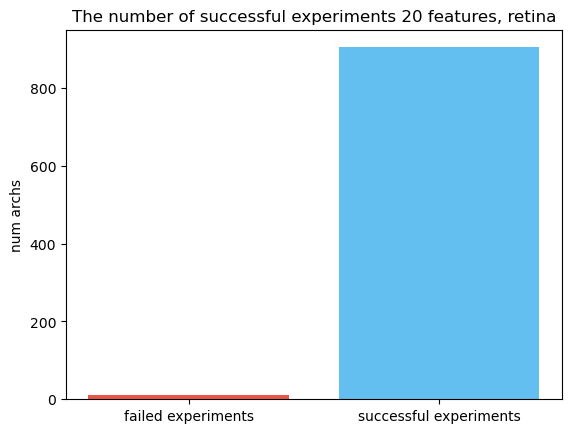

In [8]:
how_many = res.groupby(successes_fail_column_name)[successes_fail_column_name].count()
plt.bar(['failed experiments', 'successful experiments'], how_many, color=['#ea5545', '#63bff0'])
plt.ylabel('num archs')
plt.title(f'The number of successful experiments {num_features} features, {task_name}', wrap=True)
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_num_of_successful_experiments_{num_features}_fet.png")


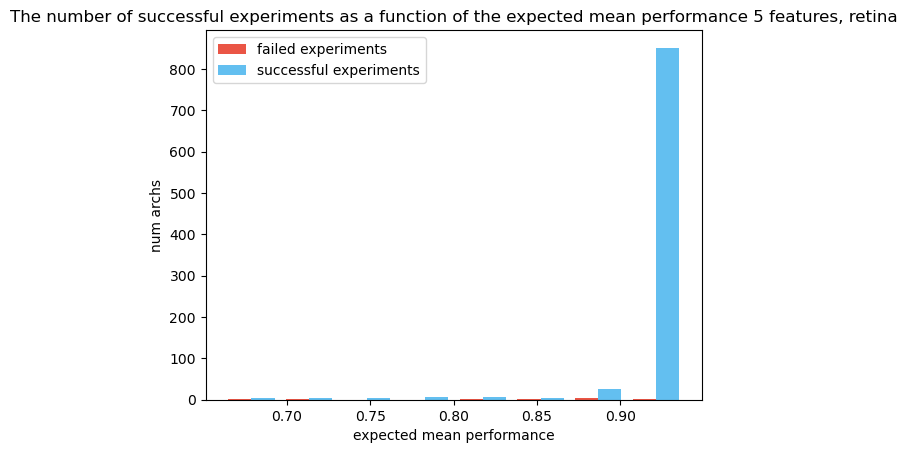

In [25]:
plt.hist([incorrect_res['mean_requiered_performance'], correct_res['mean_requiered_performance']], bins=8,
         color=['#ea5545', '#63bff0'], density=False)
plt.xlabel('expected mean performance')
plt.ylabel('num archs')
plt.legend(['failed experiments', 'successful experiments'])
plt.title(f'The number of successful experiments as a function of the expected mean performance {num_features} features, {task_name}', wrap=True)
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_normed_num_of_successful_experiments_per_performance_{num_features}_fet.png")


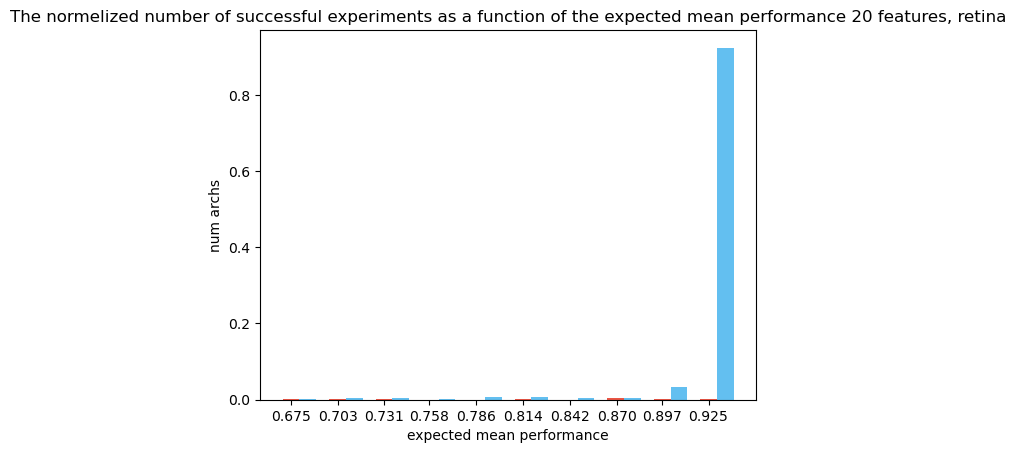

In [10]:
bins = np.arange(10)
bar_size = 0.01
padding = 0.15
y_locs = np.arange(2 * (bar_size * 2 + padding))
hist_bins_a = np.histogram(correct_res['mean_requiered_performance'], bins=10)
hist_bins_b = np.histogram(incorrect_res['mean_requiered_performance'], bins=hist_bins_a[1])
fig, ax = plt.subplots()
xs = []
for i in bins:
    xs.append(round((hist_bins_a[1][i] + hist_bins_a[1][i + 1]) / 2, 3))
    ax.bar((hist_bins_a[1][i] + hist_bins_a[1][i + 1]) / 2, [
        (hist_bins_b[0][i] / res['mean_requiered_performance'].shape[0]),
    ],
           width=bar_size, color='#ea5545',
           label='failed experiments',
           )
    ax.bar(((hist_bins_a[1][i] + hist_bins_a[1][i + 1]) / 2) + bar_size, [
        (hist_bins_a[0][i] / res['mean_requiered_performance'].shape[0]),
    ],
           width=bar_size, color='#63bff0',
           label='successful experiments',
           )

plt.xlabel('expected mean performance')
plt.ylabel('num archs')
plt.xticks(xs)
plt.title(f'The normelized number of successful experiments as a function of the expected mean performance {num_features} features, {task_name}', wrap=True)
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_normed_to_one_num_of_successful_experiments_per_performance_{num_features}_fet.png")


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_44187/1761014432.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(labels=['failed experiments', 'successful experiments'],rotation=15)


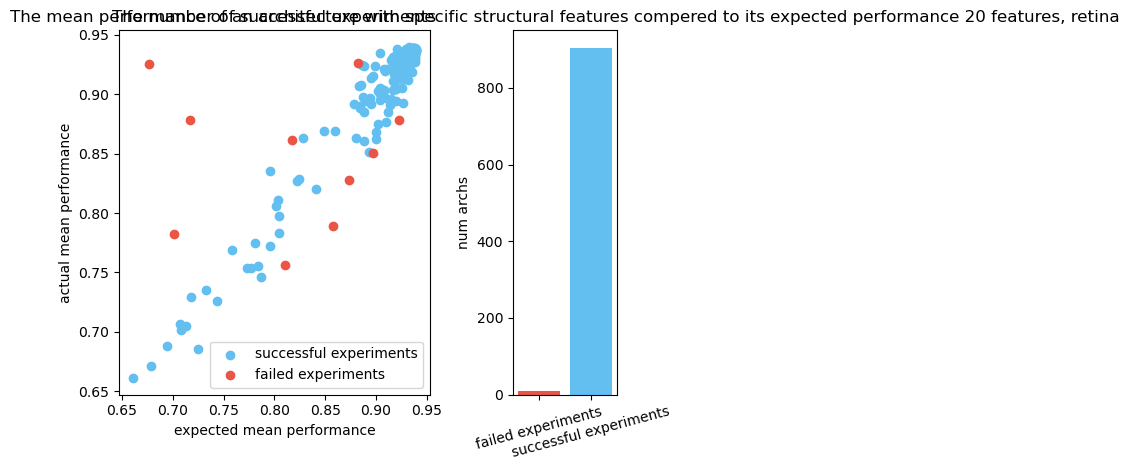

In [11]:
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
a0.scatter(correct_res['mean_requiered_performance'], correct_res['mean_performance'], c='#63bff0',
            label='successful experiments')
a0.scatter(incorrect_res['mean_requiered_performance'], incorrect_res['mean_performance'], c='#ea5545',
            label='failed experiments')

a0.set_xlabel('expected mean performance')
a0.set_ylabel('actual mean performance')
a0.legend()
a0.set_title('The number of successful experiments', wrap=True)
a1.bar(['failed experiments', 'successful experiments'], how_many, color=['#ea5545', '#63bff0'])
a1.set_ylabel('num archs')
a1.set_xticklabels(labels=['failed experiments', 'successful experiments'],rotation=15)
a1.set_title(
    f'The mean performance of an architecture with specific structural features compered to its expected performance {num_features} features, {task_name}',
    wrap=True)
plt.tight_layout()
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_performance_vs_expected_performance_successful_unsuccessful_and_num_each_{num_features}_fet.png")

In [17]:
base_path = '/home/labs/schneidmann/noamaz/modularity'
base_path = '/Volumes/noamaz/modularity'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
out_folder = 'plots/retina_from_label_to_arch_to_label'
original_archs_res=pd.read_csv('/Volumes/noamaz/modularity/teach_archs/retina/2023-04-13-16-23-07_all_results_from_retina_teach_archs_results.csv')

task_name = 'retina'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
results_path = f"{base_path}/teach_archs/{task_name}"
num_features = 5

results_folder = 'retina_teach_archs_models_requiered_features/5_features/'
res_csv_name = "2023-05-29-13-36-10_all_results_combined.csv"
res5= pd.read_csv(f"{results_path}/{results_folder}/{res_csv_name}")


In [18]:
res5['mean_requiered_performance'] = res5[['required_performance_min', 'required_performance_max']].mean(axis=1)
std =(original_archs_res['mean_performance'].std() / 2)


res5['required_performance_min'] = res5['mean_requiered_performance'] - std
res5['required_performance_max'] = res5['mean_requiered_performance'] + std

res5['bigger'] = res5['required_performance_min'] <=  res5['mean_performance']
res5['smaller']  = res5['mean_performance'] <= res5['required_performance_max']
res5['is_within_required_performance_std_range'] = res5[['bigger', 'smaller']].all(axis = 1)

In [19]:
successes_fail_column_name = 'is_within_required_performance_std_range'
res5 = res5.sort_values('mean_requiered_performance')
correct_res5 = res5[res5[successes_fail_column_name] == True]
incorrect_res5 = res5[res5[successes_fail_column_name] == False]

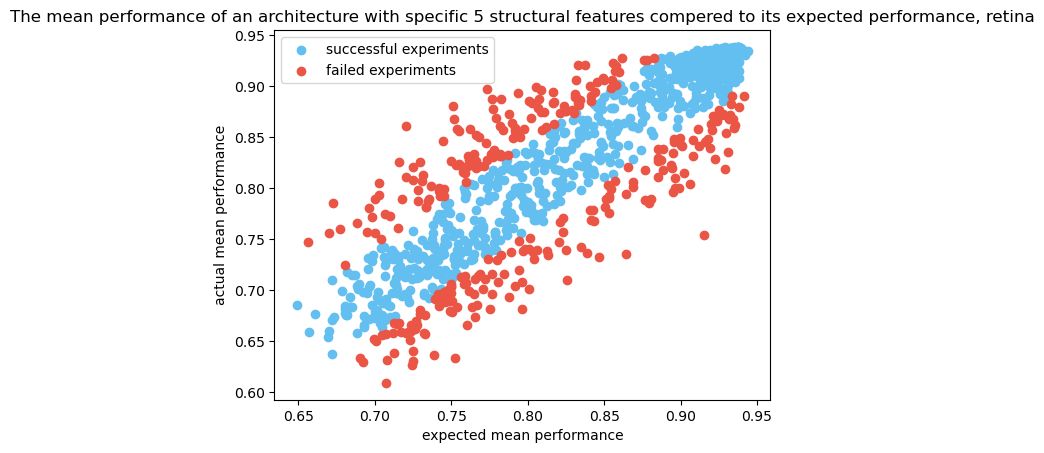

In [20]:
plt.scatter(correct_res5['mean_requiered_performance'], correct_res5['mean_performance'], c='#63bff0',
            label='successful experiments')

plt.scatter(incorrect_res5['mean_requiered_performance'], incorrect_res5['mean_performance'], c='#ea5545',
            label='failed experiments')

plt.xlabel('expected mean performance')
plt.ylabel('actual mean performance')
plt.title(
    f'The mean performance of an architecture with specific {num_features} structural features compered to its expected performance, {task_name}',
    wrap=True)
plt.legend()
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_performance_vs_expected_performance_successful_unsuccessful_{num_features}_fet.png")

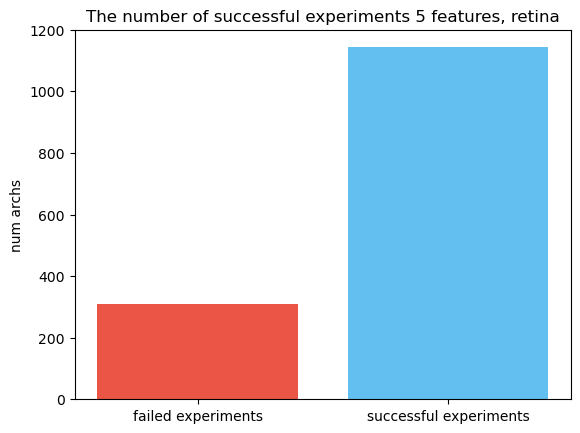

In [21]:
how_many = res5.groupby(successes_fail_column_name)[successes_fail_column_name].count()
plt.bar(['failed experiments', 'successful experiments'], how_many, color=['#ea5545', '#63bff0'])
plt.ylabel('num archs')
plt.title(f'The number of successful experiments {num_features} features, {task_name}', wrap=True)
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_num_of_successful_experiments_{num_features}_fet.png")


In [28]:
base_path = '/home/labs/schneidmann/noamaz/modularity'
base_path = '/Volumes/noamaz/modularity'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
out_folder = 'plots/retina_from_label_to_arch_to_label'
original_archs_res=pd.read_csv('/Volumes/noamaz/modularity/teach_archs/retina/2023-04-13-16-23-07_all_results_from_retina_teach_archs_results.csv')

task_name = 'retina'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
results_path = f"{base_path}/teach_archs/{task_name}"
num_features = 20

results_folder = 'retina_teach_archs_requiered_features_kernel_dist/20_features'
res_csv_name = "2023-06-01-18-34-00_all_results_combined.csv"
res_kernel= pd.read_csv(f"{results_path}/{results_folder}/{res_csv_name}")


In [29]:
res_kernel['mean_requiered_performance'] = res_kernel[['required_performance_min', 'required_performance_max']].mean(axis=1)

In [31]:
successes_fail_column_name = 'is_within_required_performance_range'
res_kernel = res_kernel.sort_values('mean_requiered_performance')
correct_res_kernel = res_kernel[res_kernel[successes_fail_column_name] == True]
incorrect_res_kernel = res_kernel[res_kernel[successes_fail_column_name] == False]

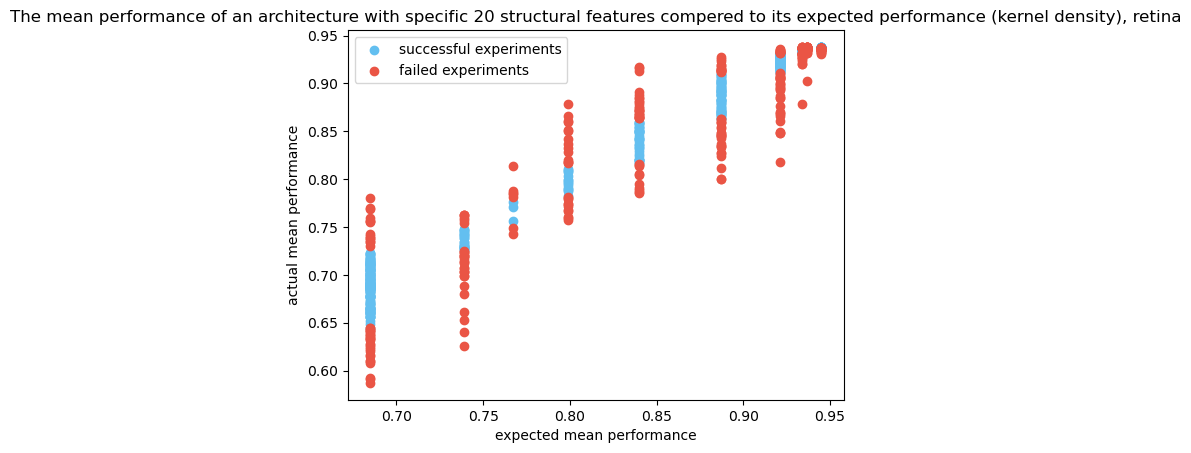

In [32]:
plt.scatter(correct_res_kernel['mean_requiered_performance'], correct_res_kernel['mean_performance'], c='#63bff0',
            label='successful experiments')

plt.scatter(incorrect_res_kernel['mean_requiered_performance'], incorrect_res_kernel['mean_performance'], c='#ea5545',
            label='failed experiments')

plt.xlabel('expected mean performance')
plt.ylabel('actual mean performance')
plt.title(
    f'The mean performance of an architecture with specific {num_features} structural features compered to its expected performance (kernel density), {task_name}',
    wrap=True)
plt.legend()
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_performance_vs_expected_performance_successful_unsuccessful_{num_features}_fet_kernel.png")

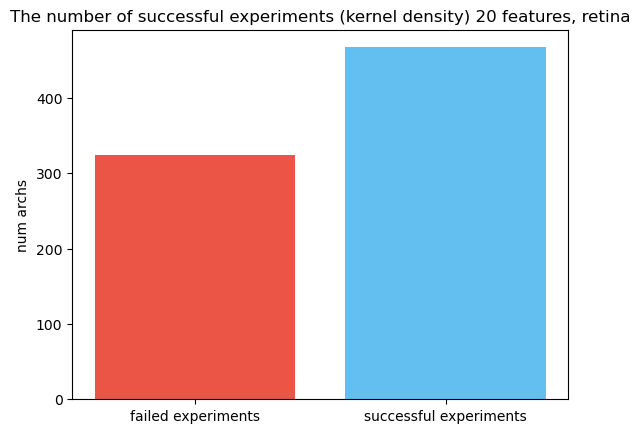

In [33]:
how_many = res_kernel.groupby(successes_fail_column_name)[successes_fail_column_name].count()
plt.bar(['failed experiments', 'successful experiments'], how_many, color=['#ea5545', '#63bff0'])
plt.ylabel('num archs')
plt.title(f'The number of successful experiments (kernel density) {num_features} features, {task_name}', wrap=True)
plt.savefig(f"{local_base_path}/{out_folder}/{time_str}_num_of_successful_experiments_{num_features}_fet_kernel.png")
